# Chordoma cell line analysis

Planned things to analyze:
- Does A431 generate drug scores that can separate between susceptible and resistant cell lines? YES for Afatinib
- What phosphosites separate the two groups?

Imports and inputs

In [1]:
import pandas as pd
import numpy as np

import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mode = 1
mode_dict = {
    1: 'A431',
    2: 'all_but_A431',
    3: 'all'
}

In [3]:
sensitivity = pd.read_excel('/home/fhamood/Downloads/CHDM cell lines_groups.xlsx')
metadata = pd.read_excel(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/SOLID_TUMORS_Metadata_230427_CJ.xlsx',
    sheet_name='SOLID_TUMORS_Metadata_CJ_oncotr')

dscores = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_{mode_dict[mode]}/drug_scores.tsv',
    sep='\t')
dscores = dscores.loc[:, ~dscores.columns.str.contains('targets')].set_index('Drug').T
dscores

Drug,AZD0156,AZD4547,Abemaciclib,Acalabrutinib,Afatinib,Alectinib,Alisertib,Alpelisib,Anlotinib,Apatinib,...,Tucatinib,Umbralisib,Upadacitinib,Vandetanib,Varlitinib,Vatalanib,Vemurafenib,Volasertib,Volitinib,Zanubrutinib
I007-031-108742,-3.099066,NaN,-1.927790,-1.478459,-0.933386,-1.226658,-0.904965,-2.533455,-1.132954,-0.506840,...,-1.914722,0.238272,-2.528418,-3.041409,-1.422236,-1.366696,-1.528772,-2.320094,NaN,-1.794870
I043-005-95540,-1.434993,NaN,-1.805628,-0.803161,-2.214696,-0.767740,-0.185088,0.091458,-0.386610,-0.953046,...,-1.523647,0.434754,-3.256009,-1.334805,-2.390193,0.407667,-1.802146,-2.541012,NaN,-2.556201
I007-020-1007541,-3.015239,NaN,-2.426577,-1.416373,-0.371067,-1.252064,-0.908965,-2.264529,-1.096005,-0.459032,...,-2.060648,0.413601,-3.096854,-2.628558,-0.747541,-1.779734,-1.917064,-3.118612,NaN,-1.612360
I007-039-130734,-3.010518,NaN,-2.412025,-1.375175,-0.647750,-1.262794,-0.868186,-2.289415,-0.774159,-0.640676,...,-1.423381,-0.021407,-2.861551,-2.721815,-1.127316,-1.301291,-1.690772,-2.823619,NaN,-1.580181
I043-001-80842,-0.930258,NaN,-1.366629,-1.247511,-1.381699,-0.489995,-0.344087,-0.029735,0.098212,-1.142967,...,-1.261957,1.174003,-3.324767,-1.610200,-1.965818,-0.433046,-1.723960,-2.512411,NaN,-2.124847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRCM-G-401,1.577075,NaN,0.328092,-0.730589,0.302553,0.527128,1.715644,1.120103,1.916311,1.417293,...,-0.233914,0.052853,2.376471,1.157785,0.284933,0.788047,1.021779,1.445868,0.275503,0.883398
SRCM-SYO-1,1.409138,NaN,1.253814,0.074575,-0.438813,0.532551,0.894677,0.233500,2.065817,1.583258,...,-0.535700,0.551619,0.178385,0.634749,-0.402813,0.957351,0.841903,1.290074,0.699476,-0.428100
SRCM-MES-SA,1.501149,NaN,0.383699,-0.912723,-0.283906,-0.233518,0.767601,0.890398,1.974731,1.484565,...,-0.388786,-0.336339,1.062978,0.976833,-0.619326,1.139109,1.442806,2.214011,0.957943,-0.725749
mean,-2.809965,0.147275,-1.784872,-0.171455,-5.512511,-0.363907,-0.071519,-0.952619,-1.169093,-0.120584,...,-0.471586,-0.101325,-0.166927,-2.339139,-3.727709,0.124977,-0.438806,-0.498776,-0.061019,-2.260039


Text(0.5, 1.0, 'Afatinib based on all')

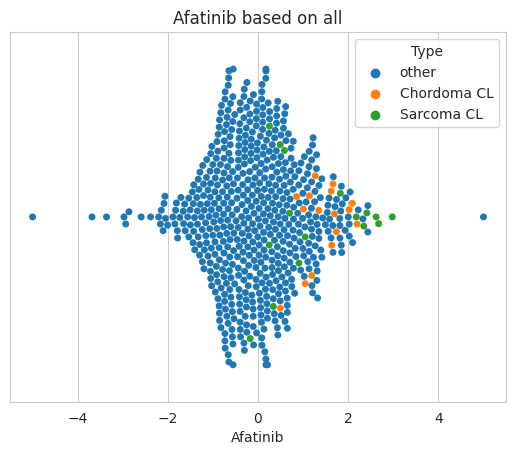

In [3]:
dscores_flagged = dscores.copy()
dscores_flagged['Type'] = 'other'
dscores_flagged.loc[dscores_flagged.index.str.startswith('CHDM'), 'Type'] = 'Chordoma CL'
dscores_flagged.loc[dscores_flagged.index.str.startswith('SRCM'), 'Type'] = 'Sarcoma CL'
dscores_flagged.loc[dscores_flagged['Afatinib'] > 5, 'Afatinib'] = 5
dscores_flagged.loc[dscores_flagged['Afatinib'] < -5, 'Afatinib'] = -5
sns.swarmplot(data=dscores_flagged, x='Afatinib', hue='Type')
plt.title(f'Afatinib based on {mode_dict[mode]}')

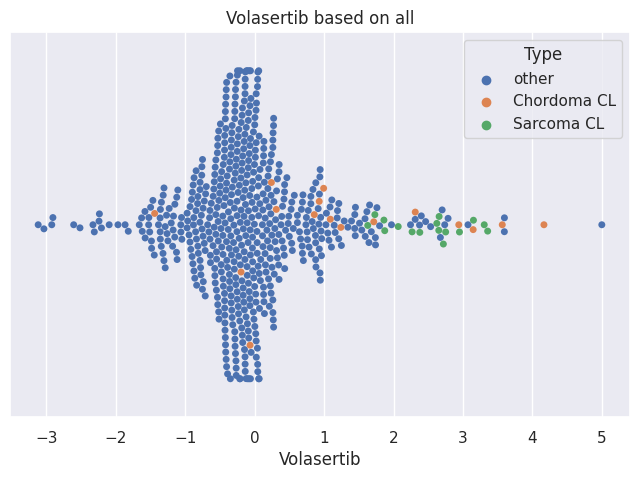

In [10]:
dscores_flagged_temp = dscores_flagged.copy()
dscores_flagged_temp.loc[:, ~dscores_flagged_temp.columns.isin(['Type'])] = dscores_flagged_temp.loc[:,
                                                                            ~dscores_flagged_temp.columns.isin(
                                                                                ['Type'])].clip(upper=5)
sns.set(rc={'figure.figsize': (8, 5)})
sns.swarmplot(data=dscores_flagged_temp, x='Volasertib', hue='Type')
plt.title(f'Volasertib based on {mode_dict[mode]}')
del dscores_flagged_temp

In [5]:
print(dscores_flagged.loc[dscores_flagged['Type'] == 'Chordoma CL', 'Volasertib'].sort_values(ascending=False))

CHDM-CH-22         4.166456
CHDM-JHC-7         3.566410
CHDM-U-CH17PII     3.147208
CHDM-UM-Chor1      2.940186
CHDM-U-CHCF365     2.313234
CHDM-U-CH1         1.715618
CHDM-13425-306     1.241882
CHDM-U-CH2         1.090480
CHDM-MUG-Chor1     0.993932
CHDM-UM-Chor5C     0.930285
CHDM-UM-Chor5D     0.859210
CHDM-U-CH12        0.311854
CHDM-MUG-CC1       0.241454
CHDM-U-CHCF359B   -0.065748
CHDM-MUG-CC1.1    -0.195280
CHDM-UM-Chor6     -1.439897
Name: Volasertib, dtype: float64


## Analysis of phosphosites scored for Afatinib score

In [4]:
annotated_peptides = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_{mode_dict[mode]}/drug_annotated_patients_with_weights.tsv',
    sep='\t')

/tmp/ipykernel_14013/3273138522.py:1: DtypeWarning: Columns (1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1241,1242,1243,1244,1245,1246,1247,1248,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377

In [5]:
annotated_peptides = annotated_peptides.loc[annotated_peptides['Drug'] == 'Afatinib'][
    ['Modified sequence', 'Drug', 'Gene names', 'PSP Kinases']].drop_duplicates(keep='first')

In [7]:
scored_sites = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_{mode_dict[mode]}/scored_peptides.tsv',
    sep='\t')

In [18]:
# TODO: Get protein information!

In [8]:
afatinib_sites = scored_sites.loc[scored_sites['Drug'] == 'Afatinib']
afatinib_sites = afatinib_sites.loc[:, afatinib_sites.columns.str.startswith('weighted_') | afatinib_sites.columns.isin(
    ['Modified sequence', 'Drug'])]
afatinib_sites = afatinib_sites.loc[~afatinib_sites.isna().all(axis=1)]
afatinib_sites.columns = afatinib_sites.columns.str.replace('weighted_', '')
afatinib_sites = pd.merge(left=annotated_peptides, right=afatinib_sites, on=['Modified sequence', 'Drug'], how='outer',
                          validate='one_to_one')
afatinib_sites.head()

,Modified sequence,Drug,Gene names,PSP Kinases,I007-031-108742,I043-005-95540,I007-020-1007541,I007-039-130734,I043-001-80842,I043-005-130270,...,SRCM-SK-LMS1,SRCM-SW-827,SRCM-KHOS-240S,SRCM-KHOS-NP,SRCM-RD-1,SRCM-HS-729,SRCM-A-204,SRCM-G-401,SRCM-SYO-1,SRCM-MES-SA
0,_(Acetyl (Protein N-term))ALEVGDM(Oxidation (M...,Afatinib,PHAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363922,1.044112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_(Acetyl (Protein N-term))ALEVGDMEDGQLpSDSDSDM...,Afatinib,PHAX,NaN,-1.173185,-1.887831,-0.775582,-0.856314,-1.790327,-1.525731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,_(Acetyl (Protein N-term))ALEVGDMEDGQLpSDpSDSD...,Afatinib,PHAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_(Acetyl (Protein N-term))ALEVGDMEDGQLSDpSDSDM...,Afatinib,PHAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.267677,0.625911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
afatinib_sites.to_csv('/media/kusterlab/file_exchange/forAnnika/fromFiras/Afatinib_Sites.csv', index=False)

Statistical testing

In [88]:
sensitive = ['CHDM-13425-306', 'CHDM-MUG-CC1', 'CHDM-MUG-CC1.1', 'CHDM-MUG-Chor1', 'CHDM-U-CH1', 'CHDM-U-CH12', 'CHDM-U-CH17PII', 'CHDM-U-CHCF365', 'CHDM-UM-Chor1']
resistant = ['CHDM-CH-22', 'CHDM-JHC-7', 'CHDM-U-CH2', 'CHDM-U-CHCF359B', 'CHDM-UM-Chor5C', 'CHDM-UM-Chor5D']

renamer_sensitive = {name: 'sen_' + name for name in sensitive}
renamer_resistant = {name: 'res_' + name for name in resistant}

cells = list(renamer_sensitive.values()) + list(renamer_resistant.values())

reduced_sites = afatinib_sites.loc[:, (afatinib_sites.columns.isin(sensitive)) | (afatinib_sites.columns.isin(resistant)) | afatinib_sites.columns.isin(['Modified sequence', 'Drug', 'Gene names'])]
reduced_sites = reduced_sites.rename(columns=renamer_sensitive)
reduced_sites = reduced_sites.rename(columns=renamer_resistant)
reduced_sites = reduced_sites.loc[~reduced_sites[cells].isna().all(axis=1)]
reduced_sites

,Modified sequence,Drug,Gene names,res_CHDM-CH-22,sen_CHDM-U-CH1,sen_CHDM-U-CH17PII,res_CHDM-U-CHCF359B,sen_CHDM-U-CHCF365,sen_CHDM-UM-Chor1,res_CHDM-JHC-7,sen_CHDM-MUG-CC1,res_CHDM-U-CH2,sen_CHDM-U-CH12,res_CHDM-UM-Chor5C,res_CHDM-UM-Chor5D,sen_CHDM-13425-306,sen_CHDM-MUG-CC1.1,sen_CHDM-MUG-Chor1
4,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,1.474315,1.948760,0.414122,2.526509,1.298950,2.480835,1.440325,1.962098,1.306622,1.098497,0.797787,1.222322,-0.308518,1.922536,1.266993
6,_AASGEDSTEEALAAAAAPWEGGPVPGVDRpSPFAK_,Afatinib,FAM21A,1.132110,1.285714,1.089173,1.027853,1.376766,1.296768,0.638260,1.446662,1.458592,1.598766,1.555325,1.546138,1.303357,1.484504,1.201087
7,_ADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.317843,0.244263,0.387493,0.293690,0.314572,0.497887,0.340541,0.309193,0.243190,0.015211,-0.027118,-0.147143,0.524616,0.130793,0.079069
8,_ADLNQGIGEPQpSPSR_,Afatinib,EFHD2,0.366775,0.322887,0.392044,0.275495,0.290434,0.403026,0.404515,0.327210,0.258039,0.177057,0.149410,0.006102,0.577338,0.268900,0.218482
9,_RADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.156202,0.079431,0.144929,0.052910,0.218193,0.464426,0.057947,0.195693,0.390005,-0.110938,-0.180175,-0.040621,0.203050,-0.011566,-0.137864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,_YVDSEGHLpYTVPIR_,Afatinib,CAV1,-0.570382,-0.740601,-0.300297,0.062020,0.337388,-0.284001,-0.800973,-0.438675,3.794653,2.040162,3.073020,2.763124,3.553907,2.280136,2.184397
859,_pSRSEPSPDAPESPSSCSPSK_,Afatinib,NHSL1,-1.636304,-0.767200,-0.566226,-0.434358,-2.389282,-0.536970,-0.885659,0.162282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,_pSSDKFCSPISSELAQNHEFYK_,Afatinib,FOXP4,-0.051788,0.617818,1.073910,-1.603308,1.353680,1.488017,0.426135,-0.082401,-1.635124,-1.367071,-0.818082,-0.708400,-0.629316,-0.845543,0.133405
866,_pSVGDGETVEFDVVEGEK_,Afatinib,YBX1;YBX2;YBX3,3.968793,3.408396,3.322578,3.393679,4.108101,3.206672,5.424282,4.725988,3.430165,3.790525,3.812023,1.814639,0.788756,4.280019,0.477323


<AxesSubplot: >

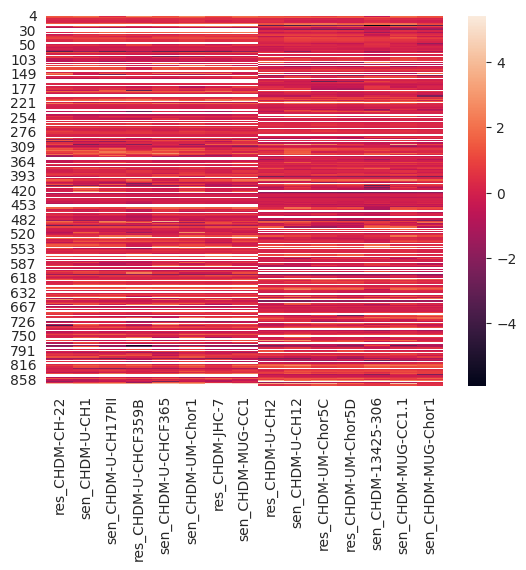

In [89]:
sns.heatmap(reduced_sites.loc[:, reduced_sites.columns.isin(renamer_sensitive.values()) | reduced_sites.columns.isin(renamer_resistant.values())])

In [92]:
len(reduced_sites.loc[~reduced_sites[cells].isna().all(axis=1)])

330

In [93]:
sorter = ['Modified sequence', 'Drug', 'Gene names'] + cells
reduced_sites = reduced_sites.loc[:, sorter]

In [0]:
df = reduced_sites.copy()
sen_intensities = df.filter(like="sen")
res_intensities = df.filter(like="res")
# df['levene_t-statistic'], df['p-value'] = sp.stats.levene(sen_intensities.T, res_intensities.T)

<AxesSubplot: ylabel='Count'>

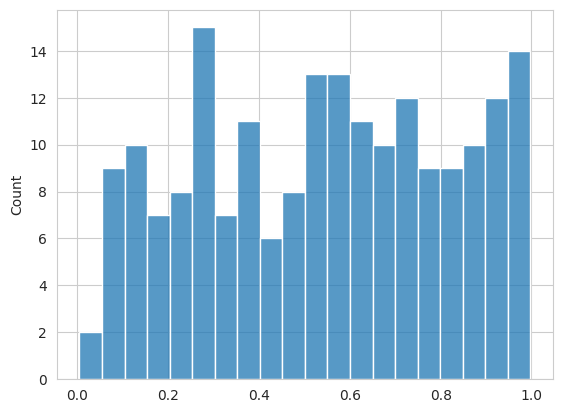

In [129]:
# Check if variances usually are equal using levene or bartlett; if not equal, welch ttest makes more sense, if they are equal, student ttest makes more sense
pvals = []
for row in df.index:
    a = df.loc[row].filter(like="sen")
    b = df.loc[row].filter(like="res")
    stat, pval = sp.stats.levene(a, b)
    pvals.append(pval)
sns.histplot(pvals, bins=20)

In [161]:
# Levene says most variances are unequal, bartlett says they are. Additionally, our sample sizes are tiny. So lets test both, and also use the Mann-Whitney U test
df['student_tstat'], df['student_pval'] = sp.stats.ttest_ind(sen_intensities.T, res_intensities.T, equal_var=True)
df['student_tstat_with_MV'], df['student_pval_with_MV'] = sp.stats.ttest_ind(sen_intensities.T, res_intensities.T, equal_var=True, nan_policy='omit')
df['welch_tstat'], df['welch_pval'] = sp.stats.ttest_ind(sen_intensities.T, res_intensities.T, equal_var=False)
df['welch_tstat_with_MV'], df['welch_pval_with_MV'] = sp.stats.ttest_ind(sen_intensities.T, res_intensities.T, equal_var=False, nan_policy='omit')
df['mw_ustat'], df['mwu_pval'] = sp.stats.mannwhitneyu(sen_intensities.T, res_intensities.T)
df['mw_ustat_with_MV'], df['mwu_pval_with_MV'] = sp.stats.mannwhitneyu(sen_intensities.T, res_intensities.T, nan_policy='omit')

In [165]:
# Number count of genes with at least one significant hit in any of the six tests
df.loc[(df['student_pval'] <= 0.05) | (df['welch_pval'] <= 0.05) | (df['mwu_pval'] <= 0.05) | (df['student_pval_with_MV'] <= 0.05) | (df['welch_pval_with_MV'] <= 0.05) | (df['mwu_pval_with_MV'] <= 0.05)]['Gene names'].value_counts()

NEDD4L     3
EIF4B      3
CHD4       3
CTNND1     2
LRRC16A    2
CRTC3      2
RELL1      2
RPS6       1
DNTTIP2    1
TBC1D8     1
CCPG1      1
CCP110     1
EPB41L1    1
CD2AP      1
FOXO4      1
Name: Gene names, dtype: int64

In [166]:
# Number count of genes with all three tests being significant, not excluding missing values
df.loc[((df['student_pval_with_MV'] <= 0.05) | (df['student_pval'] <= 0.05)) & ((df['welch_pval_with_MV'] <= 0.05) | (df['welch_pval'] <= 0.05)) & ((df['mwu_pval_with_MV'] <= 0.05) | (df['mwu_pval'] <= 0.05))]['Gene names'].value_counts()

LRRC16A    2
EIF4B      1
TBC1D8     1
CTNND1     1
CD2AP      1
CRTC3      1
RELL1      1
FOXO4      1
Name: Gene names, dtype: int64

In [167]:
# Number count of genes with all three tests being significant, excluding missing values
df.loc[(df['student_pval'] <= 0.05) & (df['welch_pval'] <= 0.05) & (df['mwu_pval'] <= 0.05)]['Gene names'].value_counts()

EIF4B     1
TBC1D8    1
CTNND1    1
CRTC3     1
RELL1     1
FOXO4     1
Name: Gene names, dtype: int64

In [163]:
df.drop(columns=['student_tstat', 'student_tstat_with_MV', 'welch_tstat', 'welch_tstat_with_MV', 'mw_ustat', 'mw_ustat_with_MV']).to_csv('/media/kusterlab/file_exchange/forAnnika/fromFiras/Afatinib_sites_stattests.csv', index=False)

In [164]:
df

,Modified sequence,Drug,Gene names,sen_CHDM-13425-306,sen_CHDM-MUG-CC1,sen_CHDM-MUG-CC1.1,sen_CHDM-MUG-Chor1,sen_CHDM-U-CH1,sen_CHDM-U-CH12,sen_CHDM-U-CH17PII,...,mw-u-stat,mwu_pval,mw-u-stat_with_MV,mwu_pval_with_MV,student_tstat,student_tstat_with_MV,welch_tstat,welch_tstat_with_MV,mw_ustat,mw_ustat_with_MV
4,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,-0.308518,1.962098,1.922536,1.266993,1.948760,1.098497,0.414122,...,25.0,0.863936,25.0,0.863936,-0.292522,-0.292522,-0.318053,-0.318053,25.0,25.0
6,_AASGEDSTEEALAAAAAPWEGGPVPGVDRpSPFAK_,Afatinib,FAM21A,1.303357,1.446662,1.484504,1.201087,1.285714,1.598766,1.089173,...,30.0,0.775624,30.0,0.775624,0.863179,0.863179,0.740940,0.740940,30.0,30.0
7,_ADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.524616,0.309193,0.130793,0.079069,0.244263,0.015211,0.387493,...,35.0,0.388412,35.0,0.388412,1.081927,1.081927,1.049794,1.049794,35.0,35.0
8,_ADLNQGIGEPQpSPSR_,Afatinib,EFHD2,0.577338,0.327210,0.268900,0.218482,0.322887,0.177057,0.392044,...,35.0,0.388412,35.0,0.388412,1.277789,1.277789,1.220123,1.220123,35.0,35.0
9,_RADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.203050,0.195693,-0.011566,-0.137864,0.079431,-0.110938,0.144929,...,33.0,0.528671,33.0,0.528671,0.435686,0.435686,0.433101,0.433101,33.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,_YVDSEGHLpYTVPIR_,Afatinib,CAV1,3.553907,-0.438675,2.280136,2.184397,-0.740601,2.040162,-0.300297,...,24.0,0.775624,24.0,0.775624,-0.460297,-0.460297,-0.434796,-0.434796,24.0,24.0
859,_pSRSEPSPDAPESPSSCSPSK_,Afatinib,NHSL1,NaN,0.162282,NaN,NaN,-0.767200,NaN,-0.566226,...,NaN,NaN,9.0,0.785714,NaN,0.268064,NaN,0.302188,NaN,9.0
861,_pSSDKFCSPISSELAQNHEFYK_,Afatinib,FOXP4,-0.629316,-0.082401,-0.845543,0.133405,0.617818,-1.367071,1.073910,...,41.0,0.113487,41.0,0.113487,1.855871,1.855871,1.940292,1.940292,41.0,41.0
866,_pSVGDGETVEFDVVEGEK_,Afatinib,YBX1;YBX2;YBX3,0.788756,4.725988,4.280019,0.477323,3.408396,3.790525,3.322578,...,22.0,0.606993,22.0,0.606993,-0.712855,-0.712855,-0.751668,-0.751668,22.0,22.0


Sarcoma vs Chordoma comparison

In [21]:
from matplotlib_venn import venn2

In [28]:
sarcomas = afatinib_sites.loc[:, afatinib_sites.columns.str.startswith('SRCM')].columns
chordomas = afatinib_sites.loc[:, afatinib_sites.columns.str.startswith('CHDM')].columns

sarcomas_sites = afatinib_sites.loc[:, afatinib_sites.columns.isin(list(sarcomas) + ['Modified sequence', 'Drug', 'Gene names'])]
chordoma_sites = afatinib_sites.loc[:, afatinib_sites.columns.isin(list(chordomas) + ['Modified sequence', 'Drug', 'Gene names'])]

sarcomas_sites = sarcomas_sites.loc[sarcomas_sites.isna().sum(axis=1) < len(sarcomas_sites.columns) - 3]
chordoma_sites = chordoma_sites.loc[chordoma_sites.isna().sum(axis=1) < len(chordoma_sites.columns) - 3]

sarcomas_sites

,Modified sequence,Drug,Gene names,SRCM-SW-982,SRCM-VA-ESBJ,SRCM-SK-ES1,SRCM-RD-ES,SRCM-SW-684,SRCM-HT-1080,SRCM-SK-LMS1,SRCM-SW-827,SRCM-KHOS-240S,SRCM-KHOS-NP,SRCM-RD-1,SRCM-HS-729,SRCM-A-204,SRCM-G-401,SRCM-SYO-1,SRCM-MES-SA
0,_(Acetyl (Protein N-term))ALEVGDM(Oxidation (M...,Afatinib,PHAX,1.285201,-0.170631,0.916111,-0.036484,0.036498,0.358541,0.363922,1.044112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,-0.449251,-0.415546,-0.599050,-0.064667,-0.173457,-0.499994,-0.267677,0.625911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,_AASGEDSTEEALAAAAAPWEGGPVPGVDRpSPFAK_,Afatinib,FAM21A,-1.117831,-1.246284,-1.204627,-1.853214,-1.438610,-0.962455,-1.036679,-1.233488,0.363706,0.274486,-0.358161,-0.044391,-0.061396,-0.004458,-0.500765,0.263323
7,_ADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.461362,0.216975,0.308524,0.082967,0.521716,0.447728,0.446335,0.473006,0.644923,0.679764,0.270979,0.351737,0.261938,0.358346,0.658453,0.853937
8,_ADLNQGIGEPQpSPSR_,Afatinib,EFHD2,0.349577,0.160836,0.254701,0.206530,0.390063,0.337828,0.329833,0.340867,0.352273,0.383884,0.334592,0.160408,0.226128,0.211396,0.384116,0.437114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,_pSRSEPSPDAPESPSSCSPSK_,Afatinib,NHSL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.480990,-1.540636,-1.557862,-2.480990,1.028468,-1.806326,-0.802987,-2.480990
861,_pSSDKFCSPISSELAQNHEFYK_,Afatinib,FOXP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.978111,-1.349043,-1.674025,-0.565457,-1.335233,-0.454295,-1.470323,0.419145
866,_pSVGDGETVEFDVVEGEK_,Afatinib,YBX1;YBX2;YBX3,0.661506,2.551023,-2.460256,-2.530883,0.427254,0.773038,1.854178,-0.309010,-2.127119,3.720780,0.264813,-1.168912,0.201615,-0.019250,-2.691919,0.276987
867,_pTISLTDFLAEDGGTGGGSTYVSK_,Afatinib,EIF4B,-0.153252,0.965025,0.019757,-0.234502,0.464332,0.383693,0.438691,-0.144530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
chordoma_sites

,Modified sequence,Drug,Gene names,CHDM-CH-22,CHDM-U-CH1,CHDM-U-CH17PII,CHDM-U-CHCF359B,CHDM-U-CHCF365,CHDM-UM-Chor1,CHDM-JHC-7,CHDM-MUG-CC1,CHDM-U-CH2,CHDM-U-CH12,CHDM-UM-Chor5C,CHDM-UM-Chor5D,CHDM-13425-306,CHDM-MUG-CC1.1,CHDM-MUG-Chor1,CHDM-UM-Chor6
4,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,1.474315,1.948760,0.414122,2.526509,1.298950,2.480835,1.440325,1.962098,1.306622,1.098497,0.797787,1.222322,-0.308518,1.922536,1.266993,2.064994
6,_AASGEDSTEEALAAAAAPWEGGPVPGVDRpSPFAK_,Afatinib,FAM21A,1.132110,1.285714,1.089173,1.027853,1.376766,1.296768,0.638260,1.446662,1.458592,1.598766,1.555325,1.546138,1.303357,1.484504,1.201087,0.978457
7,_ADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.317843,0.244263,0.387493,0.293690,0.314572,0.497887,0.340541,0.309193,0.243190,0.015211,-0.027118,-0.147143,0.524616,0.130793,0.079069,0.164928
8,_ADLNQGIGEPQpSPSR_,Afatinib,EFHD2,0.366775,0.322887,0.392044,0.275495,0.290434,0.403026,0.404515,0.327210,0.258039,0.177057,0.149410,0.006102,0.577338,0.268900,0.218482,0.315231
9,_RADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.156202,0.079431,0.144929,0.052910,0.218193,0.464426,0.057947,0.195693,0.390005,-0.110938,-0.180175,-0.040621,0.203050,-0.011566,-0.137864,-0.042957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,_YVDSEGHLpYTVPIR_,Afatinib,CAV1,-0.570382,-0.740601,-0.300297,0.062020,0.337388,-0.284001,-0.800973,-0.438675,3.794653,2.040162,3.073020,2.763124,3.553907,2.280136,2.184397,2.132101
859,_pSRSEPSPDAPESPSSCSPSK_,Afatinib,NHSL1,-1.636304,-0.767200,-0.566226,-0.434358,-2.389282,-0.536970,-0.885659,0.162282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,_pSSDKFCSPISSELAQNHEFYK_,Afatinib,FOXP4,-0.051788,0.617818,1.073910,-1.603308,1.353680,1.488017,0.426135,-0.082401,-1.635124,-1.367071,-0.818082,-0.708400,-0.629316,-0.845543,0.133405,-1.683772
866,_pSVGDGETVEFDVVEGEK_,Afatinib,YBX1;YBX2;YBX3,3.968793,3.408396,3.322578,3.393679,4.108101,3.206672,5.424282,4.725988,3.430165,3.790525,3.812023,1.814639,0.788756,4.280019,0.477323,3.097116


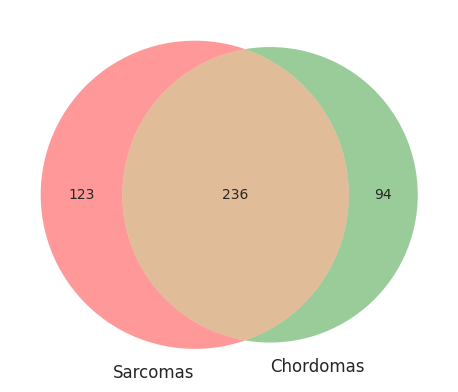

In [30]:
sarcomas_peptides = set(sarcomas_sites['Modified sequence'])
chordomas_peptides = set(chordoma_sites['Modified sequence'])

venn2([sarcomas_peptides, chordomas_peptides], set_labels=['Sarcomas', 'Chordomas'])

In [31]:
all_peptides = pd.merge(sarcomas_sites, chordoma_sites, on=['Modified sequence', 'Drug', 'Gene names'], how='outer')
all_peptides

,Modified sequence,Drug,Gene names,SRCM-SW-982,SRCM-VA-ESBJ,SRCM-SK-ES1,SRCM-RD-ES,SRCM-SW-684,SRCM-HT-1080,SRCM-SK-LMS1,...,CHDM-JHC-7,CHDM-MUG-CC1,CHDM-U-CH2,CHDM-U-CH12,CHDM-UM-Chor5C,CHDM-UM-Chor5D,CHDM-13425-306,CHDM-MUG-CC1.1,CHDM-MUG-Chor1,CHDM-UM-Chor6
0,_(Acetyl (Protein N-term))ALEVGDM(Oxidation (M...,Afatinib,PHAX,1.285201,-0.170631,0.916111,-0.036484,0.036498,0.358541,0.363922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,-0.449251,-0.415546,-0.599050,-0.064667,-0.173457,-0.499994,-0.267677,...,1.440325,1.962098,1.306622,1.098497,0.797787,1.222322,-0.308518,1.922536,1.266993,2.064994
2,_AASGEDSTEEALAAAAAPWEGGPVPGVDRpSPFAK_,Afatinib,FAM21A,-1.117831,-1.246284,-1.204627,-1.853214,-1.438610,-0.962455,-1.036679,...,0.638260,1.446662,1.458592,1.598766,1.555325,1.546138,1.303357,1.484504,1.201087,0.978457
3,_ADLNQGIGEPQpSPSRR_,Afatinib,EFHD2,0.461362,0.216975,0.308524,0.082967,0.521716,0.447728,0.446335,...,0.340541,0.309193,0.243190,0.015211,-0.027118,-0.147143,0.524616,0.130793,0.079069,0.164928
4,_ADLNQGIGEPQpSPSR_,Afatinib,EFHD2,0.349577,0.160836,0.254701,0.206530,0.390063,0.337828,0.329833,...,0.404515,0.327210,0.258039,0.177057,0.149410,0.006102,0.577338,0.268900,0.218482,0.315231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,_pSLMSVSGAETVNGEVPApTPVKR_,Afatinib,RELL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.090187,0.108050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,_SRpTASGpSSVTSLDGTR_,Afatinib,NDRG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.192568,0.644901,0.953564,1.156341,-0.425705,0.444795,0.480236,-0.602061
450,_pSQSSDTEQQSPTSGGGK_,Afatinib,EIF4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.024701,-0.264264,-0.554087,-0.630362,-0.045935,-0.328778,-0.596750,-0.196961
451,_TPTVPDpSPGYMGPTR_,Afatinib,MTSS1L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.296523,0.850670,0.510724,0.533875,0.251553,0.224237,0.439030,0.910338,0.450850,0.926557


In [32]:
all_peptides.to_csv('/media/kusterlab/file_exchange/forAnnika/fromFiras/chordoma_vs_sarcoma.csv')

In [34]:
afatinib_sites


,Modified sequence,Drug,Gene names,PSP Kinases,I007-031-108742,I043-005-95540,I007-020-1007541,I007-039-130734,I043-001-80842,I043-005-130270,...,SRCM-SK-LMS1,SRCM-SW-827,SRCM-KHOS-240S,SRCM-KHOS-NP,SRCM-RD-1,SRCM-HS-729,SRCM-A-204,SRCM-G-401,SRCM-SYO-1,SRCM-MES-SA
0,_(Acetyl (Protein N-term))ALEVGDM(Oxidation (M...,Afatinib,PHAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.363922,1.044112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,_(Acetyl (Protein N-term))ALEVGDMEDGQLpSDSDSDM...,Afatinib,PHAX,NaN,-1.173185,-1.887831,-0.775582,-0.856314,-1.790327,-1.525731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,_(Acetyl (Protein N-term))ALEVGDMEDGQLpSDpSDSD...,Afatinib,PHAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_(Acetyl (Protein N-term))ALEVGDMEDGQLSDpSDSDM...,Afatinib,PHAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_AAGGGAGpSSEDDAQSR_,Afatinib,GOLPH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.267677,0.625911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,_pSVGDGETVEFDVVEGEK_,Afatinib,YBX1;YBX2;YBX3,Akt1;RSK2;p90RSK,-2.559399,-4.683004,-0.863332,0.127166,-3.778185,-3.710844,...,1.854178,-0.309010,-2.127119,3.720780,0.264813,-1.168912,0.201615,-0.019250,-2.691919,0.276987
867,_pTISLTDFLAEDGGTGGGSTYVSK_,Afatinib,EIF4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.438691,-0.144530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,_pTTSFAESCKPVQQPSAFGSM(Oxidation (M))K_,Afatinib,GSK3B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,_pTTSFAESCKPVQQPSAFGSMK_,Afatinib,GSK3B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
